<a href="https://colab.research.google.com/github/chuvashovdo/Laboratornaya_rabota_python/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [45]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 188MB/s]


Начнем с необходимых приготовлений.

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [103]:
coins = pd.read_csv("coins.csv")
print (coins["date"])

0        2013-04-28
1        2013-04-28
2        2013-04-29
3        2013-04-29
4        2013-04-30
            ...    
37583    2018-06-06
37584    2018-06-06
37585    2018-06-06
37586    2018-06-06
37587    2018-06-06
Name: date, Length: 37588, dtype: object


Посмотрим что получилось

In [87]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [105]:
print (coins["name"].unique().size)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [106]:
print (coins["date"].min(), " - " , coins["date"].max())

2013-04-28  -  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [139]:
print (coins.isnull().sum().sum(), "\nДа, пропуски в данных есть и их 5197. Основные пропущенные поля в колоннах txCount, txVolume, activeAddresses.\n"
"Я думаю это связано с тем, что в попытке превзойти популярность Биткоина, создавали валюты транкзации которых нельзя было отследить, следовательно"
"повышалась конфиденциальность, что является важным условием для выбора хранение капитала.")


5197 
Да, пропуски в данных есть и их 5197. Основные пропущенные поля в колоннах txCount, txVolume, activeAddresses.
Я думаю это связано с тем, что в попытке превзойти популярность Биткоина, создавали валюты транкзации которых нельзя было отследить, следовательноповышалась конфиденциальность, что является важным условием для выбора хранение капитала.


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [110]:
stroka = coins[coins['high'].values.astype(float) == float(coins['high'].max())].values[0]
print(stroka[6], stroka[0], " Цена:", stroka[8])


Bitcoin 2017-12-17  Цена: 20089.0


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Cамая высокая суммарная капитализация у Bitcoin Cамая низкая суммарная капитализация у KingN Coin


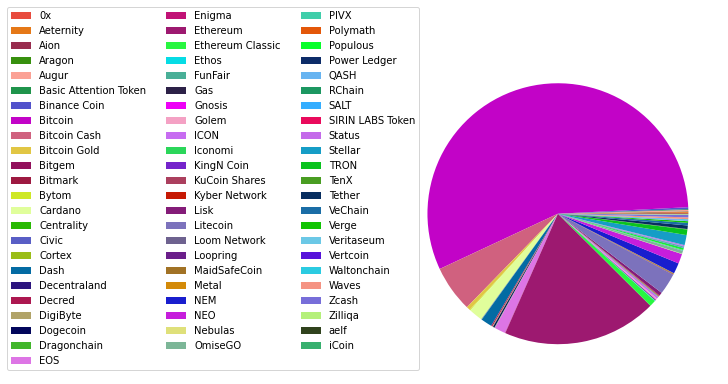

In [132]:
colors = np.random.random((100, 3))
coins = pd.read_csv("coins.csv")
market = coins[['name','market']].groupby("name").sum().reset_index()
names = market["name"].values
data = market['market'].values
fig = plt.figure(figsize = (13.5, 6))
plt.pie(data, colors=colors,center=[3,0])
plt.legend(
    ncol=3,
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.7),
    loc = 'best', labels = names)
print("Cамая высокая суммарная капитализация у", market[market["market"] == market["market"].max()].values[0][0],
      "Cамая низкая суммарная капитализация у", market[market["market"] == market["market"].min()].values[0][0])
plt.show()

## 2. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [75]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coins = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date) ]
    pnd = dict()
    for (date,(high,(op,close))) in zip(coins['date'].values,zip(coins['high'].values,zip(coins['open'].values, coins['close'].values))):
        pnd[date] = float(high)/max(float(op),float(close))
    temp = max(pnd, key=pnd.get)
    print(temp, pnd[temp])

In [67]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

2017-11-29 1.1428940004366206


Сравните эти значения для разных монет:

In [140]:
print("Если брать один и тот же период, то вот даты и значения максимальных pnd для всех монет за этот период.\n BTC 2017-11-29 1.1428940004366206\nLTC 2018-02-07 1.1082257158899496\nDOGE 2017-12-17 1.2747326203208558\nVTC 2017-10-22 1.3952095808383234\nDGB 2017-12-17 1.359942799461642\nDASH 2017-11-29 1.2031621370259378\nMAID 2017-06-07 1.291362434422475\nXLM 2017-10-16 1.332510511325105\nXVG 2017-12-17 1.726864726979804\nUSDT 2017-11-12 1.099009900990099\nXEM 2018-01-04 1.1358695652173911\nETH 2017-07-18 1.1433508255471652\nREP 2018-05-11 1.477601285025879\nDCR 2018-04-25 1.8054444587795122\nPIVX 2017-11-28 1.3587962962962963\nLSK 2017-06-07 1.4424778761061947\nWAVES 2017-06-03 1.2543352601156068\nETC 2017-12-19 1.1482493171095107\nNEO 2017-06-10 1.232142857142857\nICN 2017-12-07 2.586337382991436\nZEC 2017-09-28 1.3298776561493881\nGNT 2018-04-13 1.6882121234525305\nGNO 2018-03-25 1.653659748974773\nANT 2017-10-13 1.7336683417085428\nAE 2017-08-06 1.7482936279178192\nBAT 2017-06-04 1.2342492522991364\nVERI 2017-06-11 33.549253731343285\nFUN 2017-06-29 12.490562327959102\nPAY 2017-07-06 1.3514021619927934\nSNT 2017-11-29 1.3861630321910696\nEOS 2017-07-03 1.3202933985330074\nGAS 2017-09-14 1.477106227106227\nMTL 2017-11-20 1.6728538283062646\nPPT 2017-09-11 3.720797720797721\nBTM 2018-03-13 7.177933491925104\nOMG 2017-07-14 1.3312148056585635\nCVC 2017-12-25 1.726167450721039\nETHOS 2017-08-05 1.3698404867620457\nBNB 2017-12-26 1.176079734219269\nBCH 2017-11-12 1.783945106058206\nZRX 2018-04-05 1.254990051045648\nVEN 2017-12-27 1.2713567839195978\nNAS 2017-11-17 1.1758241758241759\nWTC 2018-01-13 1.4986168741355463\nLRC 2017-09-23 4.528409090909091\nKNC 2017-09-19 1.8519240136385777\nTRX 2017-09-16 9.651010376843255\nMANA 2017-09-21 2.9702777900454884\nSALT 2017-09-29 1.227206946454414\nADA 2017-10-01 1.2906403940886697\nRHOC 2017-10-08 5.075208458226606\nENG 2017-12-25 1.3618677042801557\nAION 2017-11-24 1.3624161073825503\nKCS 2017-10-25 1.3243755975664018\nICX 2017-12-16 1.2538461538461536\nPOWR 2017-11-02 1.3641688298886077\nBTG 2018-02-21 5.777033492822967\nQASH 2017-11-23 1.6658378856041132\nDRGN 2018-01-02 1.211764705882353\nELF 2018-01-05 1.2808988764044942\nSRN 2017-12-30 1.8916487255607852\nZIL 2018-03-05 1.4631857737419598\nPOLY 2018-02-02 1.4553773349994372\nCENNZ 2018-04-07 1.1777531885963237\nLOOM 2018-03-14 1.5265126623868979\nCTXC 2018-04-24 1.1428571428571428\n")

Если брать один и тот же период, то вот даты и значения максимальных pnd для всех монет за этот период.
 BTC 2017-11-29 1.1428940004366206
LTC 2018-02-07 1.1082257158899496
DOGE 2017-12-17 1.2747326203208558
VTC 2017-10-22 1.3952095808383234
DGB 2017-12-17 1.359942799461642
DASH 2017-11-29 1.2031621370259378
MAID 2017-06-07 1.291362434422475
XLM 2017-10-16 1.332510511325105
XVG 2017-12-17 1.726864726979804
USDT 2017-11-12 1.099009900990099
XEM 2018-01-04 1.1358695652173911
ETH 2017-07-18 1.1433508255471652
REP 2018-05-11 1.477601285025879
DCR 2018-04-25 1.8054444587795122
PIVX 2017-11-28 1.3587962962962963
LSK 2017-06-07 1.4424778761061947
WAVES 2017-06-03 1.2543352601156068
ETC 2017-12-19 1.1482493171095107
NEO 2017-06-10 1.232142857142857
ICN 2017-12-07 2.586337382991436
ZEC 2017-09-28 1.3298776561493881
GNT 2018-04-13 1.6882121234525305
GNO 2018-03-25 1.653659748974773
ANT 2017-10-13 1.7336683417085428
AE 2017-08-06 1.7482936279178192
BAT 2017-06-04 1.2342492522991364
VERI 2017-06-1

## 3. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [76]:
def compute_roi(coins, investments, start_date, end_date):
    start_paket = 0;
    end_paket = 0;
    for x in investments.keys():
        start_paket += float(coins[(coins['date'] == start_date) & (coins['symbol'] == x)]['price'].values[0]) * investments[x]
        end_paket += float(coins[(coins['date'] == end_date) & (coins['symbol'] == x)]['price'].values[0]) * investments[x]
    print((end_paket - start_paket)/start_paket)

In [77]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986


In [78]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575


## 4. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.